In [52]:
import numpy as np
from matplotlib import pyplot as plt
# Import the plot style settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rc('font', size='22')

import cosmo_wap as cw
import cosmo_wap.bk as bk #import terms for the bispectrum
import cosmo_wap.pk as pk #import terms for the powerspectrum

cosmo = cw.lib.utils.get_cosmology(k_max=100) # k_max needs to be 100 for use in compute_bias parts

survey_params = cw.survey_params.SurveyParams(cosmo)

cosmo_funcs = cw.ClassWAP(cosmo,[survey_params.Euclid],compute_bias=True)

Computing bias params...


Text(0.5, 0, '$k $ [h/Mpc]')

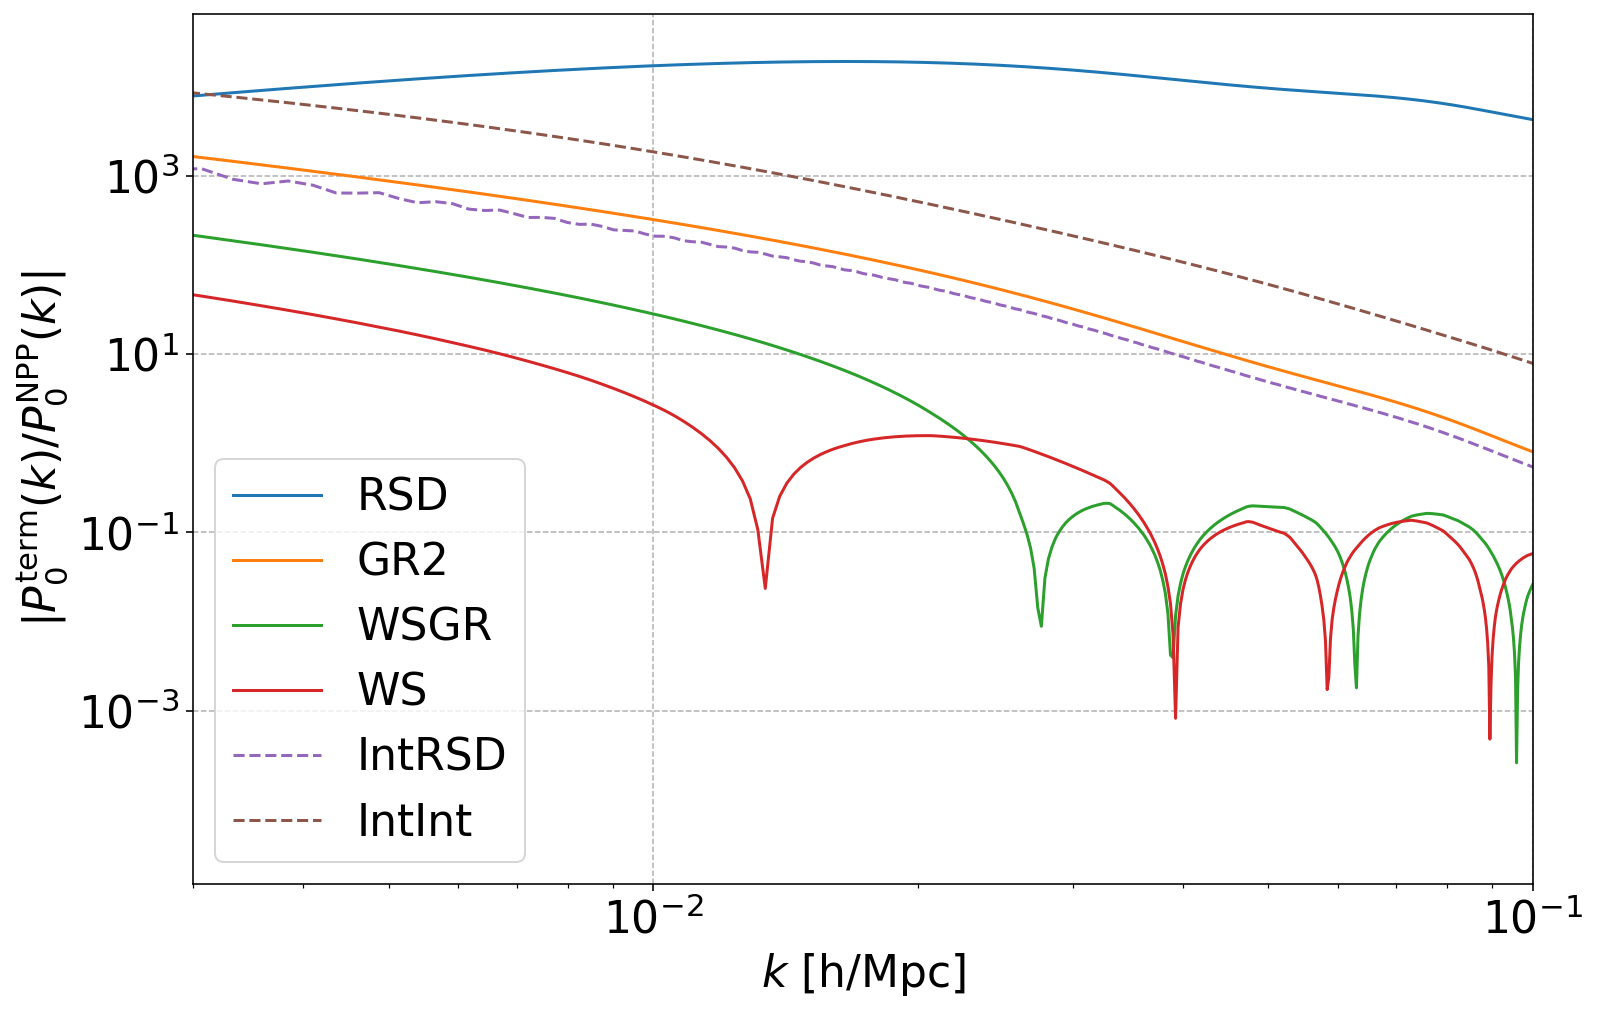

In [70]:
#for monopole 
plt.figure(figsize=(12,8))

zz=1.8 # redshift
kk = np.linspace(0.001,0.13,500)
t=0

#lets plot as fraction of monopole - NPP (Newtonian Plane-Parallel)
norm = 1#np.abs(pk.NPP.l0(cosmo_funcs,kk,zz=1,t=t).real)
cosmo_funcs = cw.ClassWAP(cosmo,[survey_params.Euclid],compute_bias=False)

#regular newtonian expression
plt.loglog(kk,np.abs(pk.NPP.l0(cosmo_funcs,kk,zz=zz,t=t).real)/norm,label='RSD') 
plt.loglog(kk,np.abs(pk.GR2.l0(cosmo_funcs,kk,zz=zz,t=t).real)/norm,label='GR2')   # pure GR
plt.loglog(kk,np.abs(pk.WSGR.l0(cosmo_funcs,kk,zz=zz,t=t).real)/norm,label='WSGR') #GR/WS mixing
plt.loglog(kk,np.abs(pk.WS.l0(cosmo_funcs,kk,zz=zz,t=t).real)/norm,label='WS')     # pure WS

plt.loglog(kk,np.abs(pk.IntRSD.l0(cosmo_funcs,kk,zz=zz,t=t,n=256).real)/norm,'--',label='IntRSD')
plt.loglog(kk,np.abs(pk.IntInt.l0(cosmo_funcs,kk,zz=zz,t=t,n1=512).real)/norm,'--',label='IntInt')
#plt.loglog(kk,np.abs(pk.Loc.l0(cosmo_funcs,kk,zz=zz,t=t).real)/norm,'--',label='PNG Loc')
#plt.loglog(kk,np.abs(pk.Eq.l0(cosmo_funcs,kk,zz=zz,t=t).real)/norm,'--',label='PNG Eq')
#plt.loglog(kk,np.abs(pk.Orth.l0(cosmo_funcs,kk,zz=zz,t=t).real)/norm,'--',label='PNG Orth')
plt.legend()
plt.xlim(0.003,0.1)

plt.ylabel(r'$| P^{\rm term}_0(k)/P^{\rm NPP}_0(k) |$')
plt.grid(ls='--',lw=0.75)
plt.xlabel(r'$k $ [h/Mpc]')

CPU times: user 4.18 s, sys: 40.2 ms, total: 4.22 s
Wall time: 4.23 s


Text(0.5, 0, '$z $')

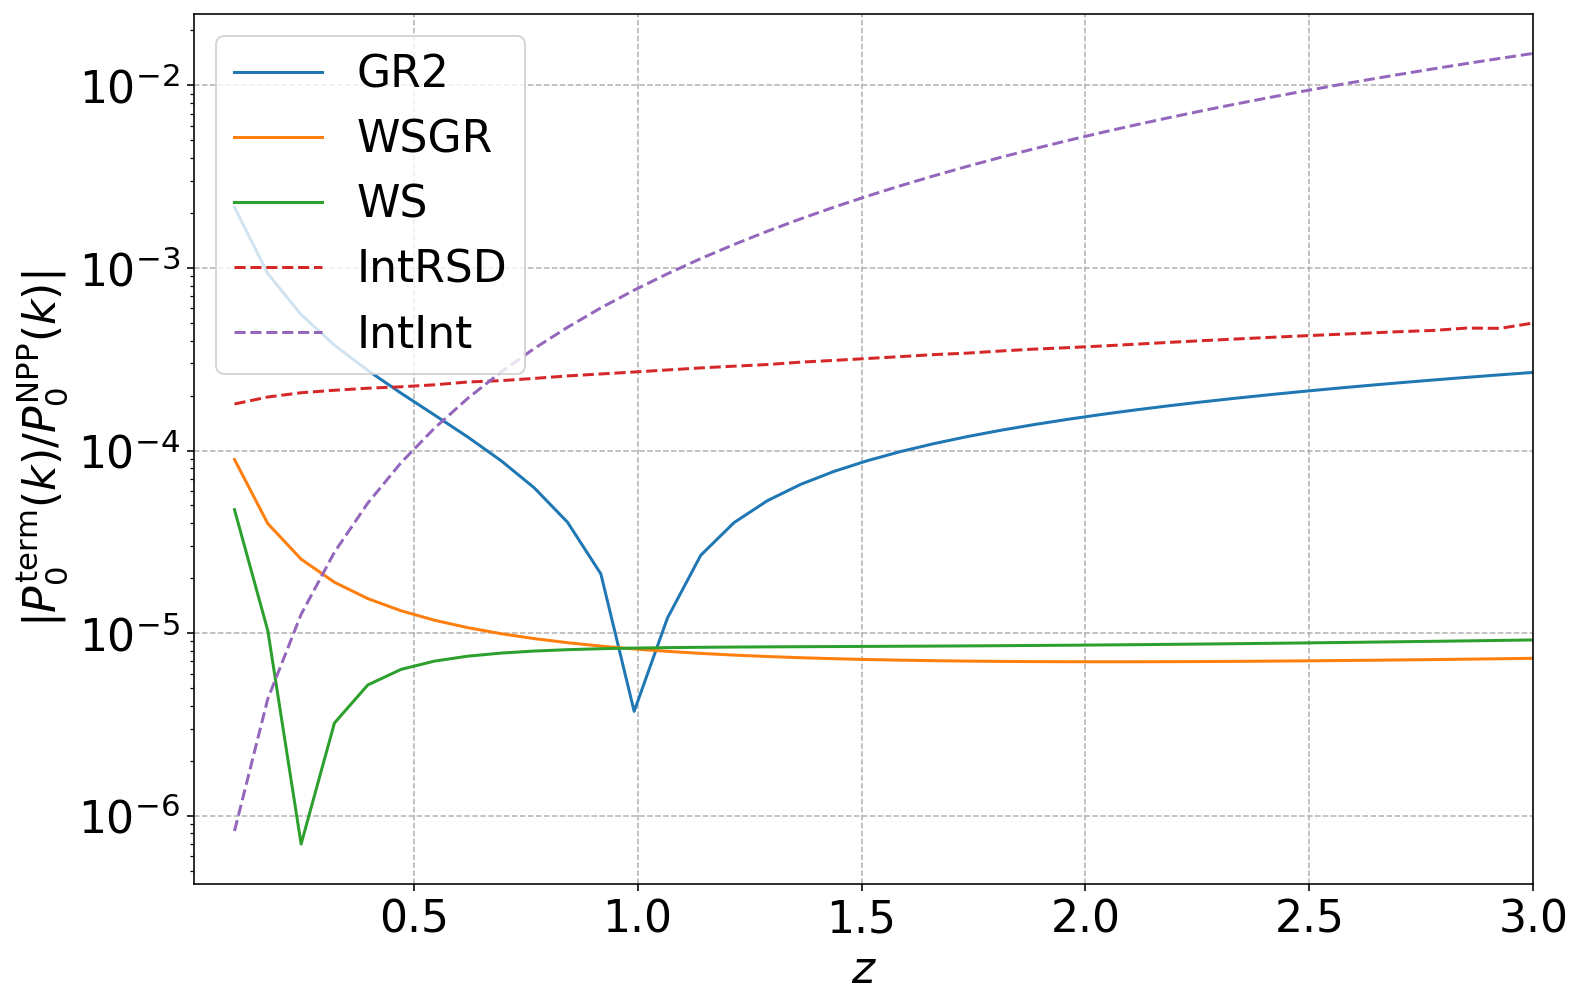

In [71]:
%%time
#for monopole 
plt.figure(figsize=(12,8))

t=1/2
cosmo_funcs = cw.ClassWAP(cosmo,[survey_params.DM_part],compute_bias=False)

z_plot = np.linspace(0.1,3,40)
kk = 0.05
#lets plot as fraction of monopole - NPP (Newtonian Plane-Parallel)
norm = np.abs(pk.NPP.l0(cosmo_funcs,kk,z_plot,t=t).real)

plt.plot(z_plot,np.abs(pk.GR2.l0(cosmo_funcs,kk,zz=z_plot,t=t).real)/norm ,label='GR2')   # pure GR
plt.plot(z_plot,np.abs(pk.WSGR.l0(cosmo_funcs,kk,zz=z_plot,t=t).real)/norm,label='WSGR')  #GR/WS mixing
plt.plot(z_plot,np.abs(pk.WS.l0(cosmo_funcs,kk,zz=z_plot,t=t).real)/norm ,label='WS')     # pure WS
#plt.plot(z_plot,np.abs(pk.Loc.l0(cosmo_funcs,kk,zz=z_plot,t=t).real)/norm,'--',label='PNG Loc')

plt.plot(z_plot,np.array([np.abs(pk.IntRSD.l0(cosmo_funcs,kk,zz=zz,t=t,n=128).real) for zz in z_plot])/norm,'--',label='IntRSD')
plt.plot(z_plot,np.array([np.abs(pk.IntInt.l0(cosmo_funcs,kk,zz=zz,t=t,n1=256).real) for zz in z_plot])/norm,'--',label='IntInt')

plt.legend()
plt.yscale('log')
plt.xlim(0.01,3)

plt.ylabel(r'$| P^{\rm term}_0(k)/P^{\rm NPP}_0(k) |$')
plt.grid(ls='--',lw=0.75)
plt.xlabel(r'$z $')

CPU times: user 7.91 s, sys: 3.29 s, total: 11.2 s
Wall time: 11.2 s


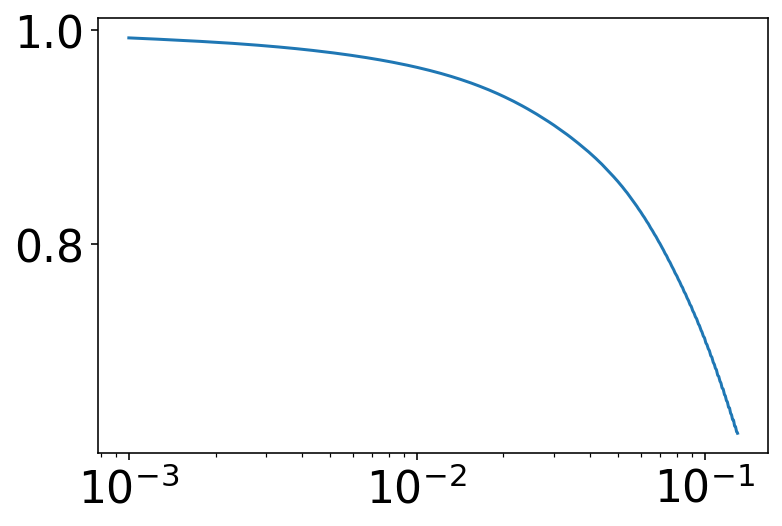

In [67]:
%%time
#plt.loglog(kk,np.abs(pk.IntRSD.l0(cosmo_funcs,kk,zz=zz,t=t).real))
#plt.loglog(kk,np.abs(pk.IntRSD.l0(cosmo_funcs,kk,zz=zz,t=t, n=32).real))
#plt.loglog(kk,np.abs(pk.IntRSD.l0(cosmo_funcs,kk,zz=zz,t=t, n=256).real))

kk = np.linspace(0.001,0.13,500)
plt.plot(kk,np.abs(pk.IntInt.l0(cosmo_funcs,kk,zz=zz,t=t,n1=256).real/np.abs(pk.IntInt.l0(cosmo_funcs,kk,zz=zz,t=t,n1=512).real)))
#plt.loglog(kk,np.abs(pk.IntInt.l0(cosmo_funcs,kk,zz=zz,t=t,n1=512).real))
#plt.loglog(kk,np.abs(pk.IntInt.l0(cosmo_funcs,kk,zz=zz,t=t,n1=1024).real))
plt.xscale('log')

In [62]:
kmax_func = lambda zz: 0.1 *cosmo_funcs.h*(1+zz)**(2/(2+cosmo_funcs.cosmo.get_current_derived_parameters(['n_s'])['n_s']))
cosmo_funcs = cw.ClassWAP(cosmo,[survey_params.Euclid],compute_bias=True)
forecast = cw.forecast.FullForecast(cosmo_funcs,kmax_func=kmax_func)
wsgr = forecast.pk_SNR("WSGR",[0],sigma=None,nonlin=False)

Computing bias params...


  0%|          | 0/9 [00:00<?, ?it/s]

In [43]:
np.array(forecast.z_bins)[:,0]


array([0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7])

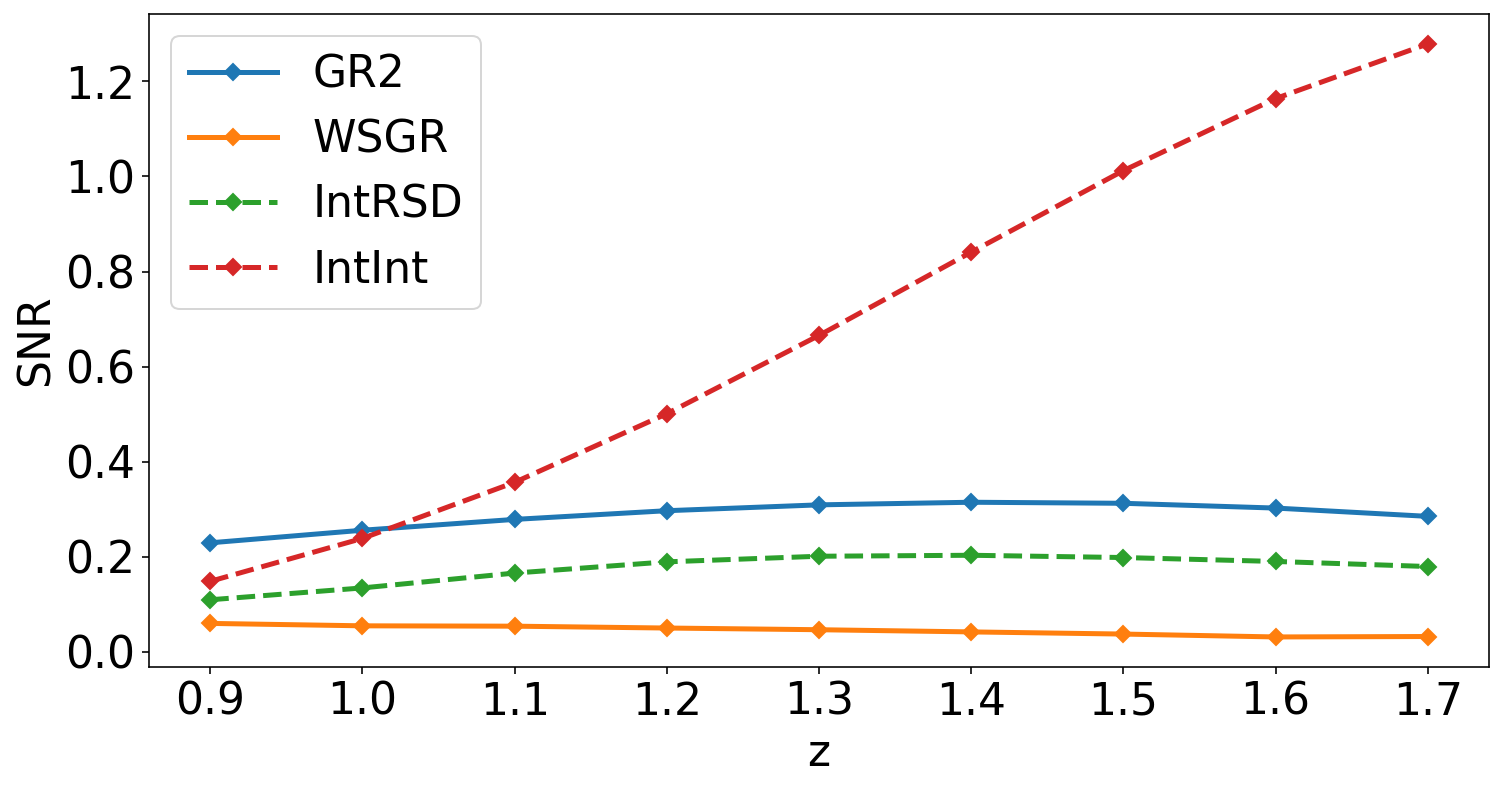

In [65]:
fig = plt.figure(figsize=(12,6))
plt.plot(np.array(forecast.z_bins)[:,0],np.sqrt(gr2.real),marker='D',linewidth=2.5,label='GR2')
plt.plot(np.array(forecast.z_bins)[:,0],np.sqrt(wsgr.real),marker='D',linewidth=2.5,label='WSGR')
plt.plot(np.array(forecast.z_bins)[:,0],np.sqrt(intrsd.real),'--',marker='D',linewidth=2.5,label='IntRSD')
plt.plot(np.array(forecast.z_bins)[:,0],np.sqrt(intint.real),'--',marker='D',linewidth=2.5,label='IntInt')
#plt.plot(np.array(forecast.z_bins)[:,0],np.sqrt(a.real),label='IntInt')
plt.xlabel('z')
plt.ylabel('SNR')
plt.legend()

In [22]:
import cProfile
import pstats
from pstats import SortKey

profiler = cProfile.Profile()

profiler.enable()

# Run the function you want to profile
kk = np.linspace(0.001,0.13,500)
np.abs(pk.IntInt.l0(cosmo_funcs,kk,zz=1,t=t,n1=256).real)

profiler.disable()

# Print the stats sorted by cumulative time
print("Profiling results sorted by cumulative time:")
stats = pstats.Stats(profiler).sort_stats(SortKey.CUMULATIVE)
stats.print_stats(20)  # Print top 10 results

# Optionally, print stats sorted by total time
print("\nProfiling results sorted by total time:")
stats.sort_stats(SortKey.TIME).print_stats(10)

Profiling results sorted by cumulative time:
         913 function calls (910 primitive calls) in 2.112 seconds

   Ordered by: cumulative time
   List reduced from 126 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    2.112    1.056 /opt/jupyterhub/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3396(run_code)
        2    0.000    0.000    2.112    1.056 {built-in method builtins.exec}
        1    0.000    0.000    2.112    2.112 <ipython-input-22-1f4fcbc2ffd3>:10(<module>)
        1    0.001    0.001    2.112    2.112 /home/addis/CosmoWAP/src/cosmo_wap/pk/int.py:32(l0)
        1    0.099    0.099    2.111    2.111 /home/addis/CosmoWAP/src/cosmo_wap/integrated.py:55(double_int)
        1    0.513    0.513    1.961    1.961 /home/addis/CosmoWAP/src/cosmo_wap/pk/int.py:36(l0_integrand)
        1    0.945    0.945    1.429    1.429 /home/addis/CosmoWAP/src/cosmo_wap/pk/int.py:54(i